**Bước 1: Cài đặt các thư viện cần thiết**

In [1]:
!pip install matplotlib==3.1.3
!pip install folium
!pip install pygeos
!pip install geopandas 
!pip install osmnet
!pip install rtree
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 13.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 13.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 9.8 MB/s 
     |████████████████████████████████| 16.7 MB 48.4 MB/s 
     |████████████████████████████████| 6.3 MB 43.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 14.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import matplotlib as mpl
import geopandas as gpd
import folium
import pygeos
import osmnet 
import rtree
import geojson
import pandas as pd
import numpy as np

**Bước 2: Clone data từ github và gg.drive**

In [27]:
!git clone https://github.com/CityScope/CSL_HCMC

fatal: destination path 'CSL_HCMC' already exists and is not an empty directory.


**Bước 3: load ranh giới quận huyện và dân số quận huyện**

In [28]:
df = gpd.read_file('CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')
df

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,24749.600,25589.300,25962.100,25098.200,27022.100,27377.900,18486.8000,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,38897.100,39227.200,39326.300,39862.100,40221.700,40422.900,38652.5000,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44428.400,44466.500,44789.300,44686.400,44750.600,44008.400,41958.7000,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36105.700,37261.600,36010.200,36256.900,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.5000,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,...,41535.600,41902.500,41828.000,41793.500,42015.600,42278.600,41138.5000,10478.512538,5.707881e+06,"POLYGON ((682507.505 1189929.778, 682485.431 1..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,...,45502.900,44404.000,44437.100,44937.200,45657.200,46206.600,40897.6000,10833.546511,5.131351e+06,"POLYGON ((681349.265 1190928.179, 681382.887 1..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,...,36793.300,36903.500,37387.100,37316.800,37174.300,37482.600,33530.3000,12392.134315,4.889837e+06,"POLYGON ((682877.988 1195927.612, 682969.684 1..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,...,19627.100,19747.900,20012.100,20281.400,20927.500,20979.800,21162.2000,23807.894025,2.243513e+07,"POLYGON ((680274.980 1198401.860, 680578.965 1..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,...,23307.600,23231.100,23372.500,23478.900,23559.400,23605.600,24016.8000,29544.712130,2.078389e+07,"POLYGON ((684986.154 1194412.964, 684987.226 1..."


**Bước 4: Load dữ liệu click của người dùng**

In [29]:
click_data = gpd.read_file('click_data.json')

In [30]:
click_data 

,dbh,geometry
0,1,POINT (106.71136 10.85113)
1,1,POINT (106.71695 10.74449)
2,1,POINT (106.66315 10.83289)
3,1,POINT (106.66267 10.83339)
4,1,POINT (106.65977 10.83729)
...,...,...
83670,1,POINT (106.65664 10.84339)
83671,1,POINT (106.75180 10.85276)
83672,1,POINT (106.73189 10.73154)
83673,1,POINT (106.67640 10.82388)


**Bước 5: Lọc ra 5 quận huyện có tốc độ tăng Mật Độ dân số nhanh nhất**

In [31]:
df['Pop2019/Pop2017'] = df['Pop_2019']/df['Pop_2017']

In [32]:
max_5 = df.nlargest(5, 'Pop2019/Pop2017')
max_5

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,Pop2019/Pop2017
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",1.277619
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.550 1...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",1.162071
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",1.129460
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",1.113104


Bước 6: 

In [33]:
from geopandas.tools import sjoin

In [34]:
click_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
max_5 = max_5.to_crs(4326)
max_5

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,Pop2019/Pop2017
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((106.84015 10.89893, 106.84048 10.897...",1.277619
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((106.58361 10.92869, 106.58391 10.928...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((106.72315 10.72162, 106.72428 10.721...",1.162071
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((106.69433 10.89842, 106.69446 10.897...",1.129460
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((106.74241 10.80855, 106.74442 10.808...",1.113104


In [36]:
click_top5 = sjoin(click_data, max_5, how='left', op='within');
click_top5 = click_top5.dropna()
click_top5

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,Pop2019/Pop2017
126,1,POINT (106.57481 10.90807),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3634.00,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,1.215639
222,1,POINT (106.76471 10.82926),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2419.33,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,1.277619
283,1,POINT (106.76238 10.59443),18.0,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,...,1188.34,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,1.162071
342,1,POINT (106.68818 10.85636),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129460
368,1,POINT (106.71118 10.85242),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83292,1,POINT (106.71130 10.85206),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129460
83372,1,POINT (106.76182 10.82430),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2419.33,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,1.277619
83394,1,POINT (106.72823 10.78867),17.0,District 2,769,District,147490.0,140621.0,137749.0,134131.0,...,2685.95,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,1.113104
83466,1,POINT (106.71118 10.86631),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129460


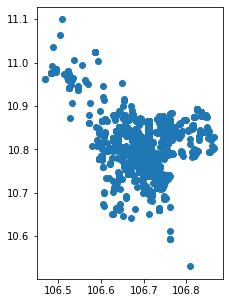

In [49]:
click_data.plot(figsize=(5,5));

**Bước 7: chạy KMean cho tập các điểm thuộc lần lượt các top 10 quận huyện này.**

In [42]:
from sklearn.cluster import KMeans

In [44]:
def kmeans(data_frame, par1, par2='geometry', n_clusters=20):
    table = data_frame[data_frame.Dist_Name == par1]
    kmeans = KMeans(n_clusters) 
    x = pd.Series(table[par2].apply(lambda p: p.x)) 
    y = pd.Series(table[par2].apply(lambda p: p.y)) 
    point = np.column_stack((x, y)) 
    y_means = kmeans.fit_predict(point) 
    table['cluster'] = y_means 
    return table

In [51]:
First = kmeans(click_top5, 'District 9', 'geometry', 20);
Second = kmeans(click_top5, 'Hoc Mon', 'geometry', 20);
Third = kmeans(click_top5, 'Nha Be', 'geometry', 20)
Fourth= kmeans(click_top5, 'District 12', 'geometry', 20);
Fifth = kmeans(click_top5, 'District 2', 'geometry', 20);

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

**Bước 8: Lưu 01 cụm điểm nhiều nhất trong các quận huyện ở Bước 5.**

In [52]:
index_1 = First['cluster'].value_counts().idxmax()
index_2 = Second['cluster'].value_counts().idxmax()
index_3 = Third['cluster'].value_counts().idxmax()
index_4 = Fourth['cluster'].value_counts().idxmax()
index_5 = Fifth['cluster'].value_counts().idxmax()

In [53]:
cluster_data = dict()
cluster_data['District 9'] = First.where(First['cluster'] == index_1).dropna()
cluster_data['Hoc Mon'] = Second.where(Second['cluster'] == index_2).dropna()
cluster_data['Nha Be'] = Third.where(Third['cluster'] == index_3).dropna()
cluster_data['District 12'] = Fourth.where(Fourth['cluster'] == index_4).dropna()
cluster_data['District 2'] = Fifth.where(Fifth['cluster'] == index_5).dropna()

In [55]:
cluster_data['District 9']

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,Pop2019/Pop2017,cluster
3321,1.0,POINT (106.81407 10.85064),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.277619,4.0
10041,1.0,POINT (106.81472 10.85354),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.277619,4.0
11864,1.0,POINT (106.81416 10.85071),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.277619,4.0
14717,1.0,POINT (106.81414 10.85450),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.277619,4.0
17351,1.0,POINT (106.81551 10.85723),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.277619,4.0
17761,1.0,POINT (106.81486 10.85358),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.277619,4.0
19829,1.0,POINT (106.81464 10.85036),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.277619,4.0
26007,1.0,POINT (106.81459 10.85042),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.277619,4.0
29336,1.0,POINT (106.81418 10.85077),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.277619,4.0
30875,1.0,POINT (106.81505 10.85354),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2489.7,2494.23,2543.5,2592.32,2719.58,3474.59,53139.22023,1.142649e+08,1.277619,4.0


**Bước 9: show lên bản đồ các cụm đông nhất theo từng quận huyện theo dạng HEATMAP**

In [56]:
data = []
for clu in cluster_data.values():
  x = pd.Series(clu['geometry'].apply(lambda p: p.x)) 
  y = pd.Series(clu['geometry'].apply(lambda p: p.y))
  point = np.column_stack((y, x)) 
  data = data + point.tolist()

In [58]:
from glob import glob
from folium import plugins
from folium.plugins import HeatMap

map = folium.Map([10.8, 106.7], tiles='CartoDB positron', zoom_start=10)
HeatMap(data).add_to(map)

for _, r in max_5.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(map)
map

HeatMap(data).add_to(map);

In [59]:
map

**Bước 10: Lưu heatmap xuống file png**

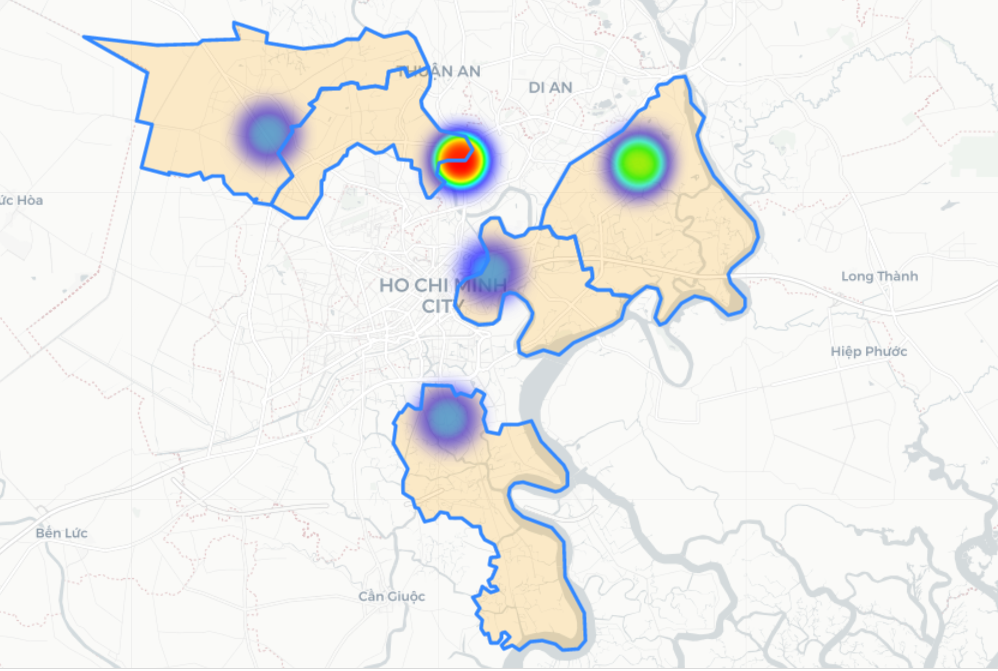